In [28]:
using TimeDependentLinearODESystems

In [29]:
using LinearAlgebra

In [30]:
#load_example("hubbard.jl")
load_example("hubbard_integrators.jl")

┌ Warning: Replacing docs for `TimeDependentLinearODESystems.Hubbard :: Tuple{Real}` in module `TimeDependentLinearODESystems`
└ @ Base.Docs docs/Docs.jl:223
┌ Warning: Replacing docs for `TimeDependentLinearODESystems.Hubbard :: Tuple{Array{Float64,1},Array{Float64,1}}` in module `TimeDependentLinearODESystems`
└ @ Base.Docs docs/Docs.jl:223
┌ Warning: Replacing docs for `LinearAlgebra.mul! :: Tuple{Any,HubbardState,Any}` in module `TimeDependentLinearODESystems`
└ @ Base.Docs docs/Docs.jl:223
┌ Warning: Replacing docs for `TimeDependentLinearODESystems.full :: Tuple{HubbardState}` in module `TimeDependentLinearODESystems`
└ @ Base.Docs docs/Docs.jl:223


In [31]:
function F(t)
    omega = 3.5
    t_p = 6
    sigma = 2
    a = 0.2
    b = cos(omega*t_p)
    exp(1im*( a*exp(-(t-t_p)^2/(2*sigma^2))*(cos(omega*(t-t_p))-b)  ))
end

F (generic function with 1 method)

In [32]:
function Fd(t)
    omega = 3.5
    t_p = 6
    sigma = 2
    a = 0.2
    b = cos(omega*t_p)
(exp(1im*( a*exp(-(t-t_p)^2/(2*sigma^2))*(cos(omega*(t-t_p))-b)  ))
*1im*a*exp(-(t-t_p)^2/(2*sigma^2))*( (
 cos(omega*(t-t_p))-b)*((-t+t_p)/sigma^2) 
 -omega*sin(omega*(t-t_p))))
end

Fd (generic function with 1 method)

In [33]:
N_s=8
n_up=div(N_s,2)
n_down=div(N_s,2)
U = 4.0

v11=0.75-0.5*5.0
v22=0.25-0.5*5.0
v12_0=1.0

v_symm=zeros(N_s,N_s)
v_anti=zeros(N_s,N_s)

v_symm[1,1]=v11;
for i=2:3 #(int i=1;i<3;i++) 
    v_symm[i,i]=v22
end
v_symm[4,4]=v11
v_symm[5,5]=v11
for i=6:7 #(int i=5;i<7;i++)  
    v_symm[i,i]=v22
end
v_symm[8,8]=v11           
      
for i=1:3 #(int i=0;i<3;i++){ 
    v_symm[i,i+1]=v12_0
    v_anti[i,i+1]=v12_0
    v_symm[i+1,i]=v12_0
    v_anti[i+1,i]=-v12_0
end
 
for i=1:4 #(int i=0;i<4;i++){ 
    v_symm[i,8-i+1]=v12_0
    v_anti[i,8-i+1]=v12_0
    v_symm[8-i+1,i]=v12_0
    v_anti[8-i+1,i]=-v12_0
end          
    
for i=5:7 #(int i=4;i<7;i++){ 
    v_symm[i,i+1]=v12_0
    v_anti[i,i+1]=-v12_0
    v_symm[i+1,i]=v12_0
    v_anti[i+1,i]=v12_0
end          


In [34]:
v_symm

8×8 Array{Float64,2}:
 -1.75   1.0    0.0    0.0    0.0    0.0    0.0    1.0 
  1.0   -2.25   1.0    0.0    0.0    0.0    1.0    0.0 
  0.0    1.0   -2.25   1.0    0.0    1.0    0.0    0.0 
  0.0    0.0    1.0   -1.75   1.0    0.0    0.0    0.0 
  0.0    0.0    0.0    1.0   -1.75   1.0    0.0    0.0 
  0.0    0.0    1.0    0.0    1.0   -2.25   1.0    0.0 
  0.0    1.0    0.0    0.0    0.0    1.0   -2.25   1.0 
  1.0    0.0    0.0    0.0    0.0    0.0    1.0   -1.75

In [35]:
v_anti

8×8 Array{Float64,2}:
  0.0   1.0   0.0   0.0  0.0   0.0   0.0   1.0
 -1.0   0.0   1.0   0.0  0.0   0.0   1.0   0.0
  0.0  -1.0   0.0   1.0  0.0   1.0   0.0   0.0
  0.0   0.0  -1.0   0.0  1.0   0.0   0.0   0.0
  0.0   0.0   0.0  -1.0  0.0  -1.0   0.0   0.0
  0.0   0.0  -1.0   0.0  1.0   0.0  -1.0   0.0
  0.0  -1.0   0.0   0.0  0.0   1.0   0.0  -1.0
 -1.0   0.0   0.0   0.0  0.0   0.0   1.0   0.0

In [36]:
H = Hubbard(N_s, n_up, n_down, v_symm, v_anti, U, F, Fd, store_upper_part_only=false);

In [37]:
size(H), typeof(H)

((4900, 4900), Hubbard)

In [38]:
H0 = H(0);

In [39]:
size(H0), typeof(H0), ishermitian(H0)

((4900, 4900), HubbardState, true)

In [40]:
lambda, g = groundstate(H0)

(-22.36207728632272, [0.002538930498448464, -0.0067641470557430515, 0.004661841742312862, -0.002357729272701016, 0.001088026732312611, 0.0035977193430691036, -0.0074297929519835165, 0.00408701885684092, -0.0017398714965872742, 0.01222866205877319  …  0.012228662058773166, -0.0023577292727010213, 0.004087018856840932, -0.007429792951983528, 0.004661841742312837, 0.0010880267323126148, -0.0017398714965872956, 0.0035977193430690945, -0.006764147055743038, 0.00253893049844845])

In [41]:
energy(H0, g)

-22.36207728632269

In [42]:
schemes = [
    ("CF2",    CF2(symmetrized_defect=true, trapezoidal_rule=true)),
    ("CF4",    CF4(symmetrized_defect=true, trapezoidal_rule=true)),
    ("CF4g6",  CF4g6(symmetrized_defect=true, trapezoidal_rule=true)), 
    ("CF4o",   CF4o(symmetrized_defect=true, trapezoidal_rule=true)), 
    ("CF6",    CF6(symmetrized_defect=true, trapezoidal_rule=true)),
    ("CF6n",   CF6n(symmetrized_defect=true, trapezoidal_rule=true)),
    ("CF6ng8", CF6ng8(symmetrized_defect=true, trapezoidal_rule=true)),
    ("CF7",    CF7(adjoint_based=true)),
    ("Magnus4", Magnus4(symmetrized_defect=true, trapezoidal_rule=true)),
    #("MagnusStrang4", MagnusStrang4(symmetrized_defect=true)),
    ("DoPri45", DoPri45),
];

In [43]:
psi0=g .+ 0.0im
for t in AdaptiveTimeStepper(H,psi0,0,5,.1,1e-7;
                 scheme=CF6, 
                 higher_order=true, expmv_tol=1e-8)
end

t=  1.000000000e-01  err=   1.03408940e+00  dt=   2.10764403e-01  rejected...
t=  9.170911933e-01  err=   1.42848790e+00  dt=   1.90174432e-01  rejected...
t=  1.826953664e+00  err=   1.34903178e+00  dt=   1.57679389e-01  rejected...
t=  2.757553322e+00  err=   1.01237969e+00  dt=   1.40315009e-01  rejected...
t=  3.450390304e+00  err=   1.04126545e+00  dt=   1.39594797e-01  rejected...
t=  4.365687578e+00  err=   1.10578645e+00  dt=   1.28776215e-01  rejected...


In [44]:
for (name,scheme) in schemes
    println(name)
    local_orders_est(H,  psi0, 0, 1.0; 
    scheme=scheme, 
    reference_scheme=CF8, reference_steps=10, rows=6, 
    expmv_tol=1e-12, expmv_m=30); 
    println()
end

CF2
             dt         err      p       err_est      p    muls/dt
-------------------------------------------------------------------
  1   1.000e+00   9.104e-03            6.054e-03             93.00
  2   5.000e-01   2.399e-03   1.92     5.237e-04   3.53     100.00
  3   2.500e-01   2.938e-04   3.03     1.770e-05   4.89     152.00
  4   1.250e-01   3.234e-05   3.18     5.046e-07   5.13     240.00
  5   6.250e-02   3.667e-06   3.14     1.456e-08   5.12     400.00
  6   3.125e-02   4.326e-07   3.08     4.334e-10   5.07     704.00

CF4
             dt         err      p       err_est      p    muls/dt
-------------------------------------------------------------------
  1   1.000e+00   3.231e-03            1.591e-03            110.00
  2   5.000e-01   1.996e-04   4.02     3.771e-05   5.40     172.00
  3   2.500e-01   7.522e-06   4.73     3.475e-07   6.76     280.00
  4   1.250e-01   2.331e-07   5.01     2.635e-09   7.04     496.00
  5   6.250e-02   7.072e-09   5.04     1.971e-11   

In [45]:

t0=0
tend=30
dt=.1
tol = 1e-5
EE = [Float64[] for scheme in schemes]
dd = [Float64[] for scheme in schemes]
tt=  [Float64[] for scheme in schemes]
cc=  [Int[] for scheme in schemes]
k=0

for (name, scheme) in schemes
println(name)
k += 1
psi = g .+ 0.0im # initial value: groundstate 'complexified'
T0 = time()
C0 = H.counter
for t in AdaptiveTimeStepper(H,psi,t0,tend,dt,tol;
                 scheme=scheme,
                 expmv_tol=1e-6, expmv_m=30)
    H1 = H(t)
    E = energy(H1, psi)
    d = sum(double_occupation(H1, psi))/N_s
    push!(tt[k], t)
    push!(EE[k], E)
    push!(dd[k], d)
    push!(cc[k], H.counter)
end
C1 = H.counter
T1 = time()
println(name,": time=",T1-T0, ", muls=",C1-C0)
end

CF2
t=  0.000000000e+00  err=   1.56947348e+00  dt=   7.74446074e-02  rejected...
t=  8.324107501e-01  err=   1.03622244e+00  dt=   6.72269067e-02  rejected...
CF2: time=3.8710649013519287, muls=7247
CF4
CF4: time=2.261547803878784, muls=5248
CF4g6
t=  5.855288017e-01  err=   1.28638282e+00  dt=   2.15025354e-01  rejected...
t=  1.427607525e+00  err=   1.43732353e+00  dt=   1.75042328e-01  rejected...
CF4g6: time=2.0746989250183105, muls=5171
CF4o
CF4o: time=2.2246079444885254, muls=4316
CF6
t=  1.190019018e+00  err=   1.16107737e+00  dt=   3.46059893e-01  rejected...
t=  1.877237220e+00  err=   2.36506354e+00  dt=   3.00354670e-01  rejected...
t=  2.771042121e+00  err=   1.73320857e+00  dt=   2.71191636e-01  rejected...
t=  3.582916756e+00  err=   1.71226612e+00  dt=   2.48683849e-01  rejected...
t=  5.319502088e+00  err=   1.26694376e+00  dt=   2.29042496e-01  rejected...
t=  6.961285590e+00  err=   1.12896271e+00  dt=   2.43332941e-01  rejected...
t=  8.723212321e+00  err=   1.14395

In [46]:
using PyPlot

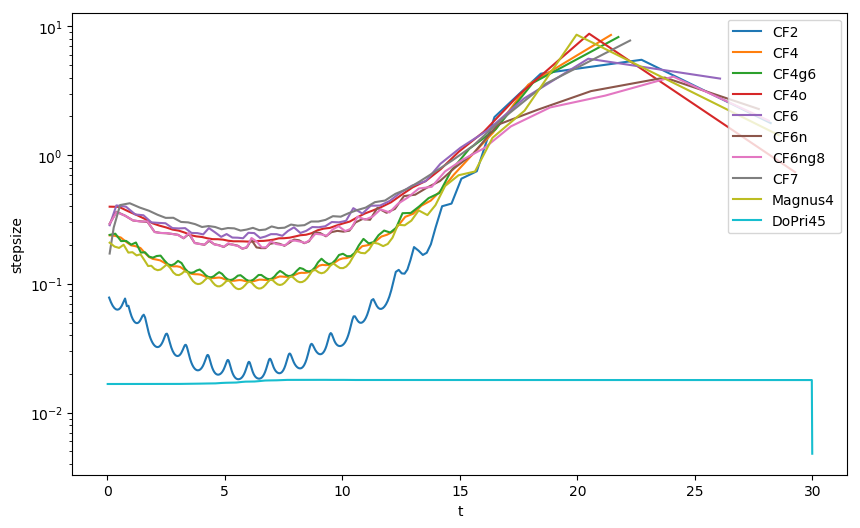

In [47]:
figure(figsize=[10,6])
k=0
for (name, scheme) in schemes
    k+=1
    semilogy(tt[k][1:end-1],(tt[k][2:end]-tt[k][1:end-1]), label=name)
end
legend(loc="upper right")
xlabel("t")
ylabel("stepsize")
;

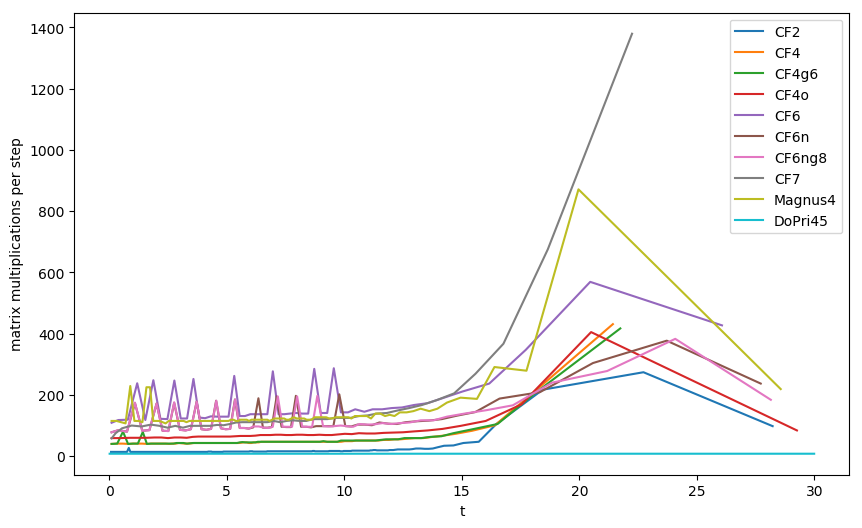

In [48]:
figure(figsize=[10,6])
k=0
for (name, scheme) in schemes
    k+=1
    plot(tt[k][1:end-1],(cc[k][2:end]-cc[k][1:end-1]), label=name)
end
legend(loc="upper right")
xlabel("t")
ylabel("matrix multiplications per step")
;

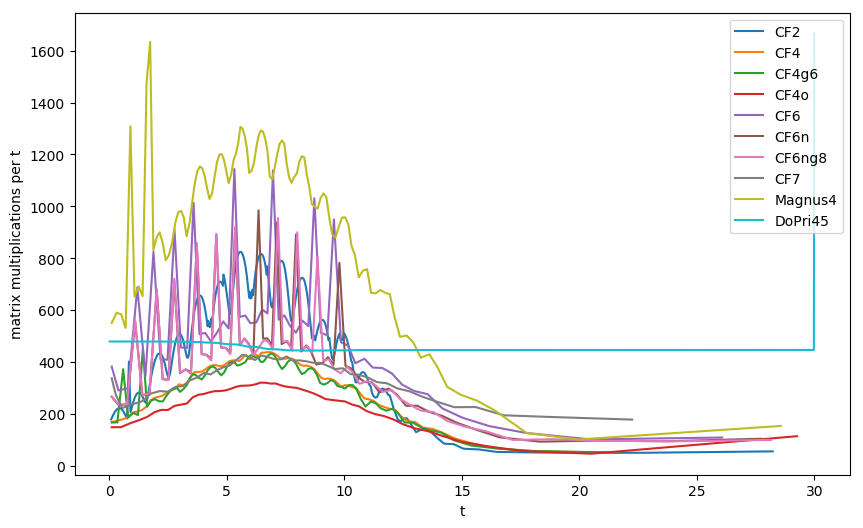

In [49]:
figure(figsize=[10,6])
k=0
for (name, scheme) in schemes
    k+=1
    plot(tt[k][1:end-1],(cc[k][2:end]-cc[k][1:end-1])./(tt[k][2:end]-tt[k][1:end-1]), label=name)
end
legend(loc="upper right")
xlabel("t")
ylabel("matrix multiplications per t")
;

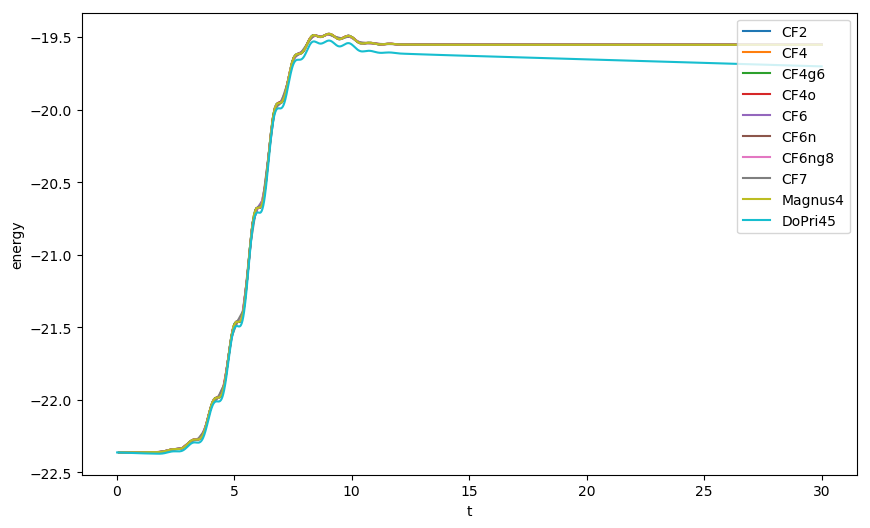

In [50]:
figure(figsize=[10,6])
k=0
for (name, scheme) in schemes
    k+=1
    plot(tt[k], EE[k], label=name)
end
legend(loc="upper right")
xlabel("t")
ylabel("energy")
;